In [77]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install intertools

ERROR: Could not find a version that satisfies the requirement intertools (from versions: none)
ERROR: No matching distribution found for intertools


In [1]:
#adding pydecomp 
%load_ext autoreload
%autoreload 2
import sys
import socket
print(socket.gethostname())
if socket.gethostname()=="Zbook":
    path_to_files="/home/lestandi/Documents/IHPC/surrogate-models-am/sample-data/powder-scale/"
    sys.path+=["/home/lestandi/Documents/thesis_light/prog/python/python_decomposition_library",
               "/home/lestandi/Documents/thesis_light/prog/python/python_decomposition_library/pydecomp"
              ]
else:
    sys.path+=["/home/llestandi/Documents/code/python/python_decomposition_library",
               "/home/llestandi/Documents/code/python/python_decomposition_library/pydecomp",
               "/home/llestandi/Documents/code/python/python_decomposition_library/pydecomp/core",
               "/home/llestandi/Documents/code/python/python_decomposition_library/pydecomp/analysis",
               "/home/llestandi/Documents/code/python/python_decomposition_library/pydecomp/utils"
              ]
    path_to_files="/home/llestandi/Documents/code/surrogate-models-am/sample-data/powder-scale/"


lestandil-ws


In [9]:
pwd

'/home/llestandi/Documents/code/python/python_decomposition_library'

In [10]:
from pydecomp.core.TSVD import TSVD
from pydecomp.core.tensor_algebra import *
import numpy as np

In [16]:
    #test procedure for the standard numpy matrix SVD
    from time import time
    print("\n Testing SVD with random matrix\n")
    n,m=10000,500
    F=np.random.rand(n,m)
    # F=np.reshape(np.arange(n*m),(n,m))

    t=time()
    phi, sigma, A=TSVD(F,solver='EVD',rank=5)
    print('\n --------------SVD by EVD computing time {}',time()-t)
    # print("\nEVD\n----------- \nphi :\n {}\n sigma:\n {} \n A:\n {}".format(phi, sigma, A))
    r=sigma.size
    sigma=np.reshape(sigma,[r,1])
    F_approx = phi@(sigma*A.T)
    err=np.linalg.norm(F_approx-F)
    print("r={}".format(r))
    print("sigma[:5]=",sigma[0:5])
    print("\n Should be small : {}".format(err))    
    
    t=time()
    phi, sigma, A=TSVD(F,solver='PRIMME',rank=-1,epsilon=1e-6)
    print('\n --------------PRIMME_SVDs computing time {}',time()-t)
    # print("\nEVD\n----------- \nphi :\n {}\n sigma:\n {} \n A:\n {}".format(phi, sigma, A))
    r=sigma.size
    sigma=np.reshape(sigma,[r,1])
    F_approx = phi@(sigma*A.T)
    err=np.linalg.norm(F_approx-F)
    print("r={}".format(r))
    print("sigma[:5]=",sigma[0:5])
    print("\n Should be small : {}".format(err))


 Testing SVD with random matrix

trying SVD by EVD

 --------------SVD by EVD computing time {} 0.0743706226348877
r=5
sigma[:5]= [[1118.39571726]
 [  35.20695318]
 [  35.15478177]
 [  35.03286105]
 [  35.00601192]]

 Should be small : 641.1203226411549
Selected PRIMME_SVDS solver. This solver is iterative and best               suited for sparse tall skinny matrices. High accuracy requirement               may lead to intractable CPU times.
500

 --------------PRIMME_SVDs computing time {} 11.762848377227783
r=500
sigma[:5]= [[1118.39571726]
 [  35.20695317]
 [  35.15478175]
 [  35.03286099]
 [  35.00601179]]

 Should be small : 0.014861878577831713


In [4]:
import scipy
import primme
# Sparse random rectangular matrix 10^5x100
#A = scipy.sparse.rand(100000, 100, density=1., random_state=10)
#print(A.size)
# Compute the three closest singular values to 6.0 with a tolerance of 1e-6
svecs_left, svals, svecs_right, stats = primme.svds(F, 5, which='LM',
                                                    return_stats=True)
A_svals = svals
print(svals)
print(stats["elapsedTime"], stats["numMatvecs"])

[1118.52712263   35.24230779   35.16203955   35.00033882   34.93556715]
1.7300770282745361 531


In [5]:
(sigma[:,0]-svals)/sigma[:,0]

array([-6.09838611e-16, -5.93772608e-10, -3.68905080e-10, -1.76656085e-09,
       -4.15527190e-09])

In [6]:
np.set_printoptions(precision=3)
print("phi orthog test")
print(phi.T@phi)
print("svecs orthog test")
print(svecs_left.T@svecs_left)

print("v orthog test")
print(A.T@A)
print("svecs orthog test")
print(svecs_right@svecs_right.T)

phi orthog test
[[ 1.000e+00 -6.189e-15 -8.160e-15  1.367e-16  4.674e-15]
 [-6.189e-15  1.000e+00 -6.145e-14 -3.733e-14  8.466e-14]
 [-8.160e-15 -6.145e-14  1.000e+00 -1.207e-13  3.648e-14]
 [ 1.367e-16 -3.733e-14 -1.207e-13  1.000e+00  1.247e-13]
 [ 4.674e-15  8.466e-14  3.648e-14  1.247e-13  1.000e+00]]
svecs orthog test
[[ 1.000e+00  1.505e-14  2.399e-14  3.095e-15 -4.238e-15]
 [ 1.505e-14  1.000e+00 -1.460e-13  1.250e-13 -4.174e-14]
 [ 2.399e-14 -1.460e-13  1.000e+00 -5.119e-14  3.959e-13]
 [ 3.095e-15  1.250e-13 -5.119e-14  1.000e+00  1.645e-13]
 [-4.238e-15 -4.174e-14  3.959e-13  1.645e-13  1.000e+00]]
v orthog test
[[ 1.000e+00 -1.579e-16  9.368e-17  9.194e-17  1.457e-16]
 [-1.579e-16  1.000e+00 -9.801e-16 -1.962e-15 -1.017e-15]
 [ 9.368e-17 -9.801e-16  1.000e+00 -7.199e-17  5.109e-16]
 [ 9.194e-17 -1.962e-15 -7.199e-17  1.000e+00  1.082e-15]
 [ 1.457e-16 -1.017e-15  5.109e-16  1.082e-15  1.000e+00]]
svecs orthog test
[[ 1.000e+00  2.689e-16  2.533e-16 -4.025e-16 -4.718e-16]
 [ 

In [15]:
qA = QuanticsTT.QuanticsTensor(np.ones((64,64)))

## Benchmarking QTT
Comparing QTT against standard 2D decomposition methods for separable functions produces intersting results. The approximation accuracy is slightly lower for fixed range because of what I would call edge effect. On the other hand for space size larger than $2^{10}$, the decomposition becomes faster, by orders of magnitude and the compression rate extremely small (as shown below). Typicall compression values are in $O(10^{-5})$ for $\varepsilon = 10^{-3}$.

2048
reshaping to [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1]
[1 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 1]
[1 2 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 2 2 1]
QTT_SVD decompostion time: 0.38 s
({'L1': [0.09969417968429255, 0.012587000355493545, 0.0015097763974960784, 0.0004595615693758124], 'L2': [0.12738750504231314, 0.01589181439105136, 0.001989266797944807, 0.0006399077396619931], 'Linf': [0.3508106190426826, 0.055687390193076135, 0.011709568183663215, 0.007219594415129407]}, array([2.003e-05, 7.629e-05, 1.564e-04, 2.346e-04]))


/home/lestandi/Documents/thesis_light/prog/python/python_decomposition_library/pydecomp/analysis/plot.py:115: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot(111)
/home/lestandi/Documents/thesis_light/prog/python/python_decomposition_library/pydecomp/analysis/plot.py:115: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot(111)
/home/lestandi/Documents/thesis_light/prog/python/python_decomposition_l

SVD_by_EVD decompostion time: 0.20 s
7 2048 1024
{'QTT_L1': array([0.1  , 0.013, 0.002, 0.   ]), 'QTT_L2': array([0.127, 0.016, 0.002, 0.001]), 'QTT_Linf': array([0.351, 0.056, 0.012, 0.007]), 'SVD_by_EVD': array([1.265e-01, 9.040e-03, 1.546e-03, 3.767e-04, 1.126e-04, 3.870e-05,
       1.474e-05])}


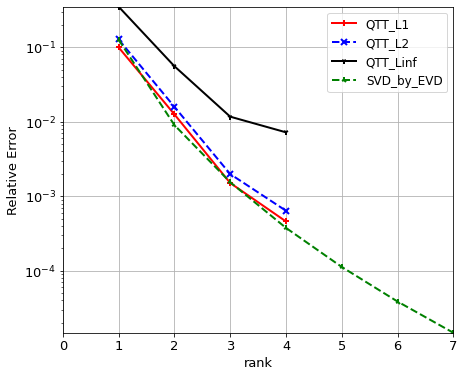

In [17]:
from analysis.benchmark_2D import benchmark_2D
decomp_methods=["QTT_SVD","SVD_by_EVD"]
N=2**11
print(N)
benchmark_2D(decomp_methods ,shape=[N,N//2], test_function=2, plot=True,
                plot_name='',tol=1e-8)

## Next development step
 - test QTT agains other high order decomposition methods
 -:thick_tickmark: Add norm comparison for all methods $L_1$, $L_2$ and $L_\infty$ norms as per requested
 - find and external library to test HT. probably no time, nor point in conding HT

In [18]:
from benchmark_multivariable import benchmark_multivariable

2097152
STHO_SVD decompostion time: 0.18 s
reshaping to [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
QTT_SVD decompostion time: 0.10 s
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1]
[1 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 1]
[1 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 1]
[1 2 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 2 1]
[1 2 4 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 4 2 1]
[1 2 4 7 7 7 7 7 7 7 7 6 7 7 7 7 6 7 6 4 2 1]
[1 2 4 8 8 8 8 8 7 7 7 6 8 8 8 8 6 7 6 4 2 1]
[1 2 4 8 8 8 8 8 7 7 7 6 9 9 9 9 6 7 6 4 2 1]
[ 1  2  4  8  8  8  8  8  7  7  7  6 10 10 10 10  6  7  6  4  2  1]
[ 1  2  4  8  8  8  8  8  7  7  7  6 10 11 11 10  6  7  6  4  2  1]
[ 1  2  4  8  8  8  8  8  7  7  7  6 10 12 12 10  6  7  6  4  2  1]
[ 1  2  4  8  8  8  8  8  7  7  7  6 10 13 13 10  6  7  6  4  2  1]
TT_SVD decompostion time: 0.25 s
[1 1 1 1]
[1 2 2 1]
[1 3 3 1]
[1 4 4 1]
[1 5 5 1]


/home/lestandi/Documents/thesis_light/prog/python/python_decomposition_library/pydecomp/analysis/plot.py:177: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot(111)
/home/lestandi/Documents/thesis_light/prog/python/python_decomposition_library/pydecomp/analysis/plot.py:177: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot(111)
/home/lestandi/Documents/thesis_light/prog/python/python_decomposition_l

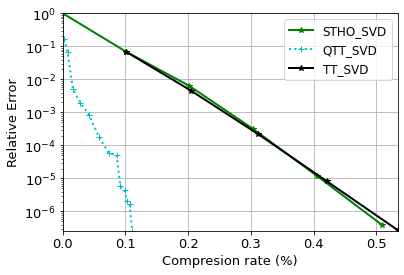

In [35]:
    decomp_methods=["STHO_SVD","QTT_SVD","TT_SVD"]
    solver=["SVD","SVD","SVD"]
    # decomp_methods=["RPOD","HO_POD","SHO_POD","TT_SVD","PGD"]
    # solver=["trapezes","trapezes","trapezes","SVD",'trapezes']
    shape=[2048,32,32]
    N=np.product(shape)
    Norm="Linf"
    tol=1e-14
    print(N)
    if N>1e7:
        raise Error("Warning, N may be too large")
    path="/home/lestandi/Documents/thesis_light/prog/python/python_decomposition_library/plots/"
    output=path+"benchmark_"+str(shape)+"_"+Norm+"_tol"+str(tol)+".pdf"
    benchmark_multivariable(decomp_methods, solver ,shape=shape,
                            test_function=1, plot=True,output_decomp='',
                            plot_name='',tol=tol,which_norm=Norm)

The above benchmarking script shows that QTT is able to greatly reduce the size of the compressed tensor, provided that one of the dimensions (typically the first one, is much larger than the other dimensions. **Add QTT to the paper and state this, when it comes to pure compression (without intent for later use as RB)**

# Testing HT
I have implemented a simple version of TT, let's see how it runs

In [6]:
from pydecomp.core.hierarchical_decomp import *
from pydecomp.analysis.plot import *
from benchmark_multivariable import benchmark_multivariable

In [6]:
n=50
x = np.random.random([n, n, n, n])
x = np.random.random([30, 5 ,40, 9])
eps_list=[1e-1,1e-2]#,1e-4,1e-4,1e-5,1e-6,1e-7,1e-8]
error_data, compression_data = HT_build_error_data(x,eps_list,eps_tuck=1e-4,rmax=200,verbose=0)

In [7]:
approx_data=[error_data,compression_data]
print(approx_data)

[{'L1': [0.4937301825320409, 0.4937301825320409], 'L2': [0.49509949342404913, 0.49509949342404913], 'Linf': [0.6817828005154712, 0.6817828005154712]}, array([0.04833333, 0.04833333])]


In [7]:
benchmark_norm_plotter(approx_data, show=True, plot_name="")

NameError: name 'approx_data' is not defined

1048576
({'L1': [0.0005461658233056392, 0.0005461658233056392, 1.415314205970234e-05, 1.415314205970234e-05, 1.415314205970234e-05, 1.415314205970234e-05, 6.233635249858316e-07, 6.233635249858316e-07, 6.233635249858316e-07], 'L2': [0.0007265848685514961, 0.0007265848685514961, 1.9121551879729662e-05, 1.9121551879729662e-05, 1.9121551879729662e-05, 1.9121551879729662e-05, 8.215717529246303e-07, 8.215717529246303e-07, 8.215717529246303e-07], 'Linf': [0.002423231294922251, 0.002423231294922251, 0.00011495926554996871, 0.00011495926554996871, 0.00011495926554996871, 0.00011495926554996871, 1.1802846798053546e-05, 1.1802846798053546e-05, 1.1802846798053546e-05]}, array([0.00415802, 0.00415802, 0.00416183, 0.00416183, 0.00416183,
       0.00416183, 0.00416565, 0.00416565, 0.00416565]))
HT decompostion time: 0.33 s
TT_SVD decompostion time: 0.00 s
computing erorr with maxrank=4
Sampling parameter set todefault
reshaping to [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
QTT_SVD d

/home/lestandi/Documents/thesis_light/prog/python/python_decomposition_library/pydecomp/analysis/plot.py:180: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot(111)
/home/lestandi/Documents/thesis_light/prog/python/python_decomposition_library/pydecomp/analysis/plot.py:180: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot(111)
/home/lestandi/Documents/thesis_light/prog/python/python_decomposition_l

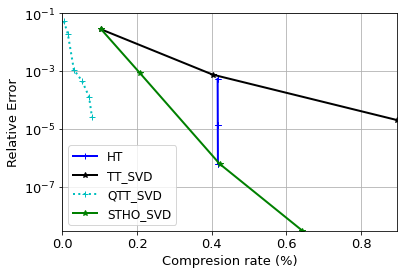

In [68]:
    decomp_methods=["HT","TT_SVD","QTT_SVD","STHO_SVD","PGD"]
    solver=["SVD","SVD","SVD","SVD"]
    # decomp_methods=["RPOD","HO_POD","SHO_POD","TT_SVD","PGD"]
    # solver=["trapezes","trapezes","trapezes","SVD",'trapezes']
    shape=[32,1024,32]
    #shape=[19,60000,5]
#     decomp_methods=["QTT_SVD"]
#     solver=["SVD"]
#     n=16
#     shape=[n for i in range(5)]
    N=np.product(shape)
    Norm="L1"
    tol=1e-8
    print(N)
    if N>1e8:
        raise Error("Warning, N may be too large")
    path="/home/lestandi/Documents/thesis_light/prog/python/python_decomposition_library/plots/"
    output=path+"benchmark_"+str(shape)+"_"+Norm+"_tol"+str(tol)+".pdf"
    benchmark_multivariable(decomp_methods, solver ,shape=shape,
                            test_function=1, plot=True,output_decomp='',
                            plot_name='',tol=tol,which_norm=Norm)


In [73]:
import math
math.log(8388608,2)

23.0

In [3]:
from analysis.numerical_tests import *

In [5]:
Vega_test([1])


 Vega function test
 Case 1 


AttributeError: reduction_method : 'TT_SVD' is not a valid method

In [48]:
!pwd

/home/lestandi/Documents/thesis_light/prog/python/python_decomposition_library
